In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/final.csv', index_col=0)

# Section Objectives:

The goal of this section was to analyze makes of airplanes that appeared heavily in the context of aerial application.
We began first by comparing the two most frequently occurring makes associated with aerial application. After a 
wide angle look at Air Tractor and Grumman, we filtered down our data to focus on the top four occurring manufacturers,
and their respective best entries for comparison. The measures we focused on were: fatality rates, destruction rates,
injuries per flight, and weather related considerations. 

## Air Tractor and Grumman planes had the most records pertaining to aerial application.

In [22]:
air_tractor = df[df['make'] == "Air Tractor"]
grumman = df[df['make'] == "Grumman"]

Here are several plots we used to assess various strengths and weaknesses between the two manufacturers.

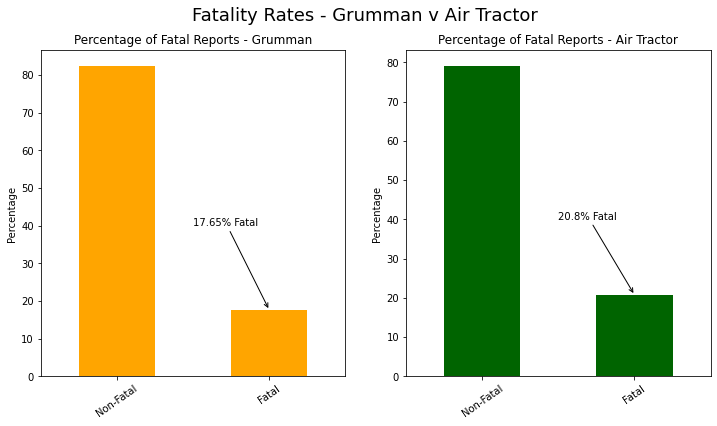

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
(grumman['injury_severity'].value_counts(normalize=True)*100).plot(ax=ax[0], color='orange',
    kind='bar', title = 'Percentage of Fatal Reports - Grumman', ylabel="Percentage", rot=35)
ax[0].annotate(text="17.65% Fatal", xy=(1, 17.65), 
        xytext=(0.5, 40), arrowprops=dict(arrowstyle='->'))
ax[0].set_xticklabels(["Non-Fatal", "Fatal"])

(air_tractor['injury_severity'].value_counts(normalize=True)*100).plot(ax=ax[1], color='darkgreen',
    kind='bar', title = 'Percentage of Fatal Reports - Air Tractor', ylabel="Percentage", rot=35)
ax[1].set_xticklabels(["Non-Fatal", "Fatal"])
ax[1].annotate(text="20.8% Fatal", xy=(1, 20.8), 
        xytext=(0.5, 40), arrowprops=dict(arrowstyle='->'))
plt.suptitle("Fatality Rates - Grumman v Air Tractor", fontsize=18);

 Air Tractor's reports are 3.15% more likely to involve fatalities than Grumman's reports.

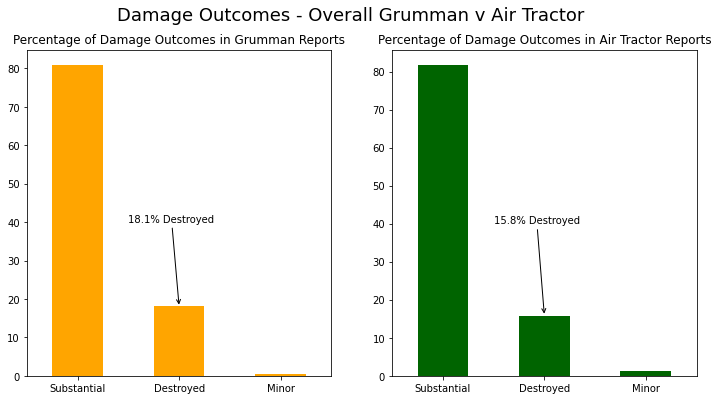

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))

(grumman["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', 
    ax=ax[0], title="Percentage of Damage Outcomes in Grumman Reports", rot=0, color='orange')

(air_tractor["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', 
    ax=ax[1], title="Percentage of Damage Outcomes in Air Tractor Reports", rot=0, color='darkgreen')

ax[0].annotate(text="18.1% Destroyed", xy=(1, 18.), 
        xytext=(.5, 40), arrowprops=dict(arrowstyle='->'))

ax[1].annotate(text="15.8% Destroyed", xy=(1, 15.8), 
        xytext=(.5, 40), arrowprops=dict(arrowstyle='->'))
plt.suptitle("Damage Outcomes - Overall Grumman v Air Tractor", fontsize=18);

Grumman's planes are 2.3% more likely to be destroyed in reports than Air Tractor's, perhaps due to the continued inclusion of their other airplanes through this point. 

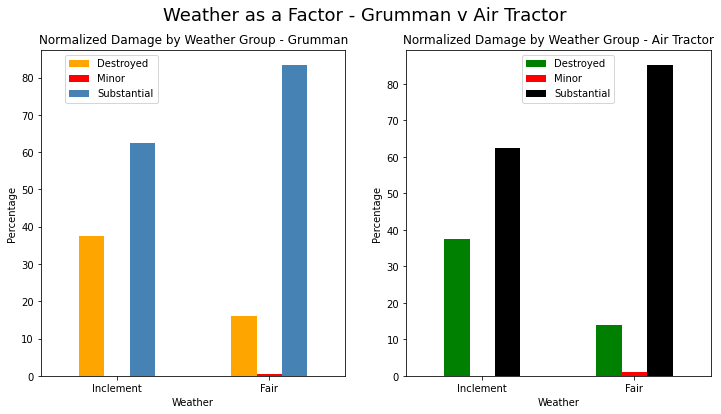

In [23]:
# This cell creates a chart to depict the percentage of damage outcome results in different weather conditions

grumman_grouped_data = grumman.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
grumman_grouped_data.drop(["Unknown"], axis=1, inplace=True)
grumman_normalized_data = grumman_grouped_data.div(grumman_grouped_data.sum(axis=1), axis=0) * 100

at_grouped_data = air_tractor.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
at_grouped_data.drop(["Unknown"], axis=1, inplace=True)
at_normalized_data = at_grouped_data.div(at_grouped_data.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(ncols=2, figsize=(12,6))

grumman_normalized_data.drop("Unknown").plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized Damage by Weather Group - Grumman", ax=ax[0], ylabel="Percentage",
     color=["orange", "red", 'steelblue', 'turquoise'])

ax[0].set_xticklabels(["Inclement", "Fair"])
ax[0].legend_.set_title("Aircraft Damage")
ax[0].legend(bbox_to_anchor=(0.4, 1))

at_normalized_data.drop(["Unknown", 'Unk']).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized Damage by Weather Group - Air Tractor", ax=ax[1], 
    ylabel="Percentage", color=["green", "red", 'black', 'yellow'])
ax[1].set_xticklabels(["Inclement", "Fair"])
ax[1].legend_.set_title("Aircraft Damage")
ax[1].legend(bbox_to_anchor=(0.7, 1))
plt.suptitle("Weather as a Factor - Grumman v Air Tractor", fontsize=18);

Both manufacturers have extremely similar performance in different weather conditions. 

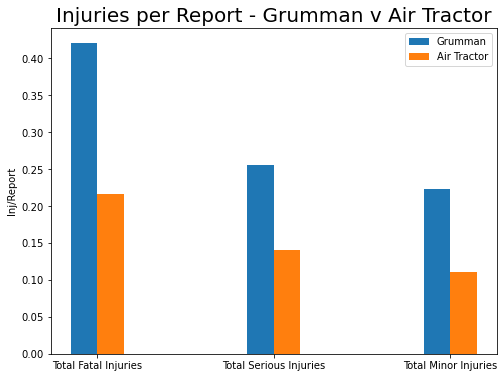

In [24]:
# This cell plots a chart to depict the rates of injury types per report

fig, ax = plt.subplots(figsize=(8, 6))
grum = grumman[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum().div(
    len(grumman))
at = air_tractor[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum().div(
    len(air_tractor))

values = np.array([grum, at])

x_positions = np.arange(len(values[0]))
width=0.15
for i in range(len(values)):
    ax.bar(x_positions + width*i, values[i], width=width)

ax.set_ylabel('Inj/Report')
ax.set_title('Injuries per Report - Grumman v Air Tractor', fontsize=20)

injury_types = ['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries']
ax.set_xticks(x_positions + width*(len(values)-1)/2)
ax.set_xticklabels(injury_types)

makes = ['Grumman', 'Air Tractor']
ax.legend(makes);

Both planes have 37.5% destruction rate in poor weather. Air Tractor has a 13.8% destruction rate in clear weather, which is better than Grumman at 16.1%.  In comparing both manufacturers from a wide angle, Grumman has better fatal crash rate, whereas Air Tractor has fewer total deaths/report. Also, although there is some missing data for Air Tractor, their planes show that they are more resilient to damage.

In [25]:
# This cell will create a filtered dataframe for workplanes.
work_planes = df.loc[(df['purpose_of_flight'] == "Aerial Application") | (df['purpose_of_flight'] == "Unknown")].copy()

In [10]:
# This cell will make sure that as many makes are captured as possible through mapping

work_planes['make'] = work_planes['make'].map(lambda x: "Air Tractor" if "Air Tractor" in x else x).copy()
work_planes['make'] = work_planes['make'].map(lambda x: "Cessna" if "Cessna" in x else x).copy()
work_planes['make'] = work_planes['make'].map(lambda x: "Grumman" if "Grumman" in x else x).copy()
work_planes['make'] = work_planes['make'].map(lambda x: "Piper" if "Piper" in x else x).copy()

In [26]:
# This cell will consolidate the models for each representative manufacturer that we want to compare.

work_planes.loc[work_planes['make'] == "Grumman", 'model'] = work_planes.loc[
    work_planes['make'] == "Grumman", 'model'].map(lambda x: "164" if "164" in x else x).copy()

work_planes.loc[work_planes['make'] == "Air Tractor", 'model'] = work_planes.loc[
    work_planes['make'] == "Air Tractor", 'model'].map(lambda x: "301" if "301" in x else x).copy()

work_planes.loc[work_planes["make"] == "Piper", 'model'] = work_planes.loc[work_planes["make"] == "Piper", 'model'].map(
    lambda x: "36" if "36" in x else x).copy()

work_planes.loc[work_planes['make'] == "Cessna", 'model'] = work_planes.loc[
    (work_planes['make'] == "Cessna", 'model')].map(lambda x: "188" if "188" in x else x).copy()

In [27]:
# this cell will assign the final DataFrame to compare the final four models

models = ['301', '188', '36', '164']
makes = ["Grumman", "Air Tractor", "Cessna", "Piper"]

four = work_planes.loc[(work_planes['make'].isin(
    makes) == True) & (work_planes['model'].isin(models) == True)].copy()

## Now that we have filtered of data to our final four models, we will begin visualizing some relationships between the models of planes.

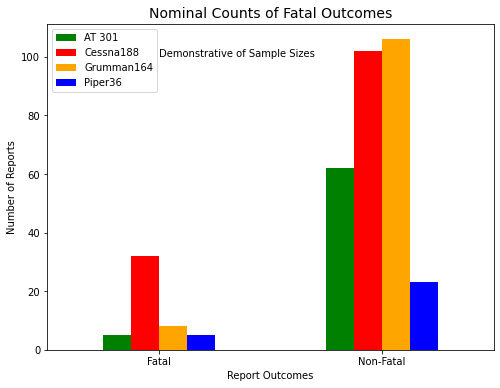

In [28]:
# plot a chart with nominal counts of mortality outcomes in reports of the four models

ax = four.groupby(['injury_severity', "make"])['model'].size().unstack().plot(kind='bar', stacked=False, 
                figsize=(8,6), rot=0, color=['green', 'red', 'orange', 'blue'])
plt.legend(title="Make")
plt.legend(["AT 301", "Cessna188", "Grumman164", "Piper36"])
plt.ylabel("Number of Reports")
plt.xlabel("Report Outcomes")
ax.set_xticklabels(["Fatal", "Non-Fatal"])
plt.title("Nominal Counts of Fatal Outcomes", fontsize=14)
plt.annotate(xy=(0., 100), text="Demonstrative of Sample Sizes")
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/Final_4_MODEL_inj_comp.jpg');

This chart shows that Cessna and Grumman have the largest sets representative data amongst the final four, and it is possible to make some observations about the proportions of fatal and non-fatal reports.

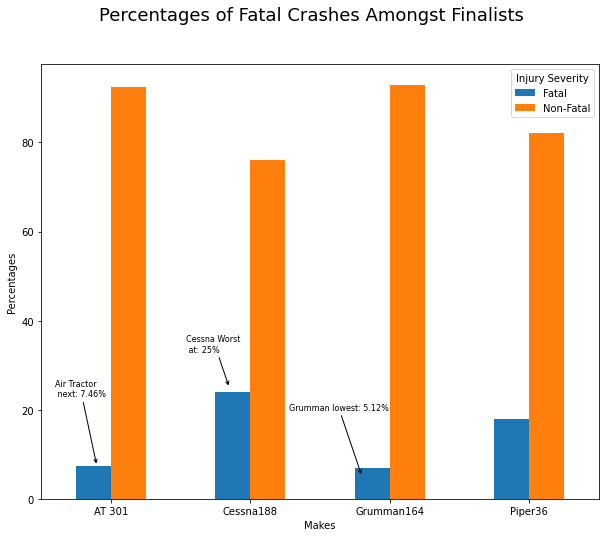

In [29]:
# This cell will chart the percentage of fatal and non-fatal reports, the normalized version of the above chart

f_g = four.groupby(['make', 'injury_severity']).size().unstack()

f_g_normalized = f_g.div(f_g.sum(axis=1), axis=0) * 100

ax = f_g_normalized.plot(kind='bar', stacked=False, figsize=(10, 8), rot=0)
plt.suptitle("Percentages of Fatal Crashes Amongst Finalists", fontsize=18)
plt.xlabel("Makes")
plt.ylabel("Percentages")
plt.legend(["Fatal", "Non-Fatal"], title="Injury Severity")
plt.annotate(text="Grumman lowest: 5.12%", xy=(1.8, 5.12), fontsize=8, 
             xytext=(1.275, 20), arrowprops=dict(arrowstyle='->'))
plt.annotate(text="Air Tractor \n next: 7.46%", xy=(-.1, 7.46), fontsize=8, 
             xytext=(-0.4, 23), arrowprops=dict(arrowstyle='->'))
plt.annotate(text="Cessna Worst \n at: 25%", xy=(.85, 25), fontsize=8, 
             xytext=(.54, 33), arrowprops=dict(arrowstyle='->'))
ax.set_xticklabels(["AT 301", "Cessna188", "Grumman164", "Piper36"])
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/FINAL_4_MODEL_inj_NORM.jpg');

Grumman continues to have the lowest rate of deadly crashes, followed by Air Tractor and Piper. Cessna 188'ss rate of fatal crashes is notably worse than the rest of the field.

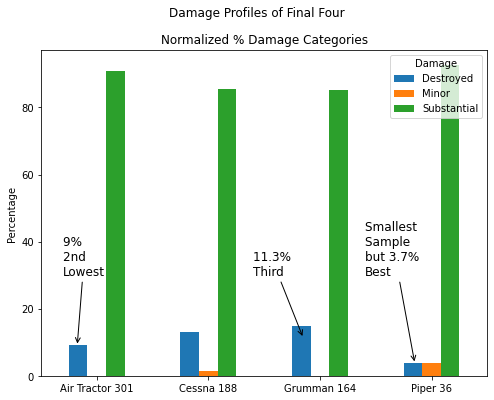

In [30]:
# This cell will produce of chart with the percentage outcomes of 3 different damage categories in reports

four_damage = four.groupby(['make','aircraft_damage']).size().unstack()
four_damage.drop(["Unknown"], axis=1, inplace=True)
four_damage_normalized = four_damage.div(four_damage.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(8,6))
four_damage_normalized.plot(kind='bar', ax=ax, rot=0)
ax.set_title("Normalized % Damage Categories")
ax.set_ylabel("Percentage")
ax.legend(title="Damage")
ax.set_xlabel("")
ax.set_xticklabels(['Air Tractor 301','Cessna 188', 'Grumman 164', 'Piper 36'])
plt.suptitle("Damage Profiles of Final Four")
ax.annotate(xy=(-.175,9), fontsize=12, text="9% \n2nd \nLowest", xytext=(-.3, 30), arrowprops=dict(arrowstyle="->"))
ax.annotate(xy=(1.850,11.3), fontsize=12, text="11.3% \nThird", xytext=(1.4, 30), arrowprops=dict(arrowstyle="->"))
ax.annotate(xy=(2.850,3.7), fontsize=12, text="Smallest \nSample \nbut 3.7% \nBest", xytext=(
    2.4, 30), arrowprops=dict(arrowstyle="->"));

This chart shows the different percentages outcomes represent within their model's records. While the Piper 36 has a higher fatality rate than Grumman or Air Tractor, it still maintains a low destruction rate. Air Tractor and Grumman continue to test well.

In [15]:
# This cell assigns values of injury rates to variables for plotting in the future

at_inj_f = (four[four['make']=="Air Tractor"][
    ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()).div(
    len(four[four['make']=="Air Tractor"])) 

g_inj_f= (four[four['make']=="Grumman"][
    ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()).div(
    len(four[four['make']=="Grumman"]))

cess_inj_f = (four[four['make']=="Cessna"][
    ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()).div(
    len(four[four['make']=="Cessna"]))

pip_inj_f = (four[four['make']=="Piper"][
    ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()).div(
    len(four[four['make']=="Piper"]))

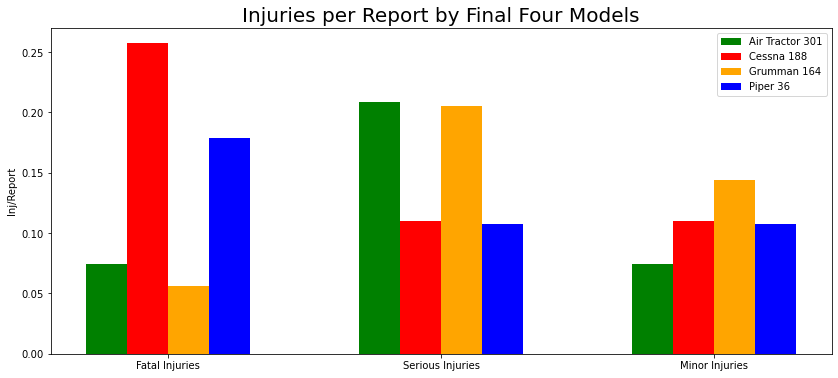

In [31]:
# uses the above variables to plot injuries per report

values = np.array([at_inj_f, cess_inj_f, g_inj_f, pip_inj_f])
colors = ["green", "red", "orange", "blue"]

x_positions = np.arange(len(values[0]))

fig, ax = plt.subplots(figsize=(14,6))

width=0.15
for i in range(len(values)):
    ax.bar(x_positions + width*i, values[i], width=width, color=colors[i])

ax.set_ylabel('Inj/Report')
ax.set_title('Injuries per Report by Final Four Models', fontsize=20)

injury_types = ['Fatal Injuries', 'Serious Injuries', 'Minor Injuries']
ax.set_xticks(x_positions + width*(len(values)-1)/2)
ax.set_xticklabels(injury_types)

makes = ['Air Tractor 301','Cessna 188', 'Grumman 164', 'Piper 36']

ax.legend(makes);

Grumman 164 has the lowest rate of deaths/report out of the group. Once again, Air Tractor 301 and Grumman 164 keep pace across the different categories of injuries. Grumman has a 2% lower fatal crash rate, and Air Tractor has a 2% lower rate of being destroyed in accidents. Their distribution of survivable injuries is very similar. It may come down to a judgement on the value of a human life versus the value of a plane.

##  In this final section, we will take one more final look at Grumman v Air Tractor

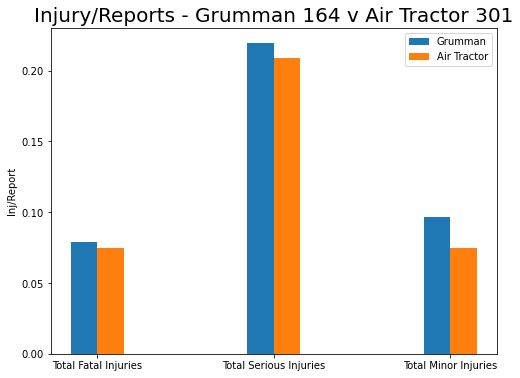

In [32]:
# this cell plots a final comparison of injuries per report between Grumman 164 and Air Tractor 301

fig, ax = plt.subplots(figsize=(8, 6))
grum_inj = four.loc[four['make'] == 'Grumman'][['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum().div(
    len(four.loc[four['make'] == 'Grumman']))
at_inj = four.loc[four['make'] == 'Air Tractor'][['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum().div(
    len(four.loc[four['make'] == 'Air Tractor']))

values = np.array([grum_inj, at_inj])

x_positions = np.arange(len(values[0]))
width=0.15
for i in range(len(values)):
    ax.bar(x_positions + width*i, values[i], width=width)

ax.set_ylabel('Inj/Report')
ax.set_title('Injury/Reports - Grumman 164 v Air Tractor 301', fontsize=20)

injury_types = ['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries']
ax.set_xticks(x_positions + width*(len(values)-1)/2)
ax.set_xticklabels(injury_types)

makes = ['Grumman', 'Air Tractor']
ax.legend(makes);

Grumman 164 profiles fractionally better than the 301 in terms of injuries per report. Grumman 164 also has 195 total records, Air Tractor 301 has 67, making Grumman's results slightly more persuasive.

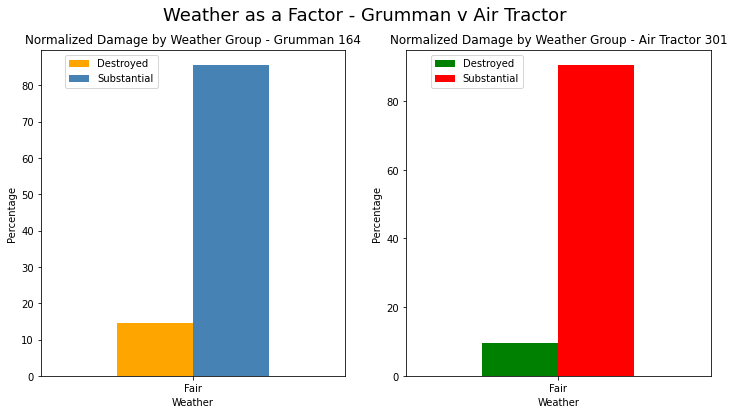

In [33]:
# this cell plots an assessment of the two models relative to the weather data we have for them

grum_weath = four.loc[four['make'] == 'Grumman'].copy()
air_weath = four.loc[four['make'] == 'Air Tractor'].copy()

grum_weath_grouped_data = grum_weath.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
grum_weath_normalized_data = grum_weath_grouped_data.div(grum_weath_grouped_data.sum(axis=1), axis=0) * 100

air_weath_grouped_data = air_weath.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
air_weath_grouped_data.drop(["Unknown"], axis=1, inplace=True)
air_weath_normalized_data = air_weath_grouped_data.div(air_weath_grouped_data.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(ncols=2, figsize=(12,6))

grum_weath_normalized_data.drop("Unknown").plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized Damage by Weather Group - Grumman 164", ax=ax[0], ylabel="Percentage",
     color=["orange", 'steelblue'])

ax[0].set_xticklabels(["Fair"])
ax[0].legend_.set_title("Aircraft Damage")
ax[0].legend(bbox_to_anchor=(0.4, 1))

air_weath_normalized_data.drop(["Unknown", 'Unk']).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized Damage by Weather Group - Air Tractor 301", ax=ax[1], 
    ylabel="Percentage", color=["green", "red", 'black', 'yellow'])
ax[1].set_xticklabels(["Fair"])
ax[1].legend_.set_title("Aircraft Damage")
ax[1].legend(bbox_to_anchor=(0.4, 1))
plt.suptitle("Weather as a Factor - Grumman v Air Tractor", fontsize=18);

In fair weather, Air Tractor is destroyed 9.5% of the time in reports, and Grumman is destroyed 10.9% of the time in those reports. Unfortunately, both models only have data for fair weather, so we could not make further comparisons based on weather, thereby preventing us from authoratatively declaring one model better than the other.

Our primary takeaway is that Air Tractor 301's are slightly more physically durable, whereas Grumman 164's are better at protecting their pilots. Making a 